In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#simple undirected graph
G = nx.Graph()
#simple directed graph
GD= nx.DiGraph()
#multi-graph
GM= nx.MultiGraph()
#multi-Di-Graph
GMD= nx.MultiDiGraph()

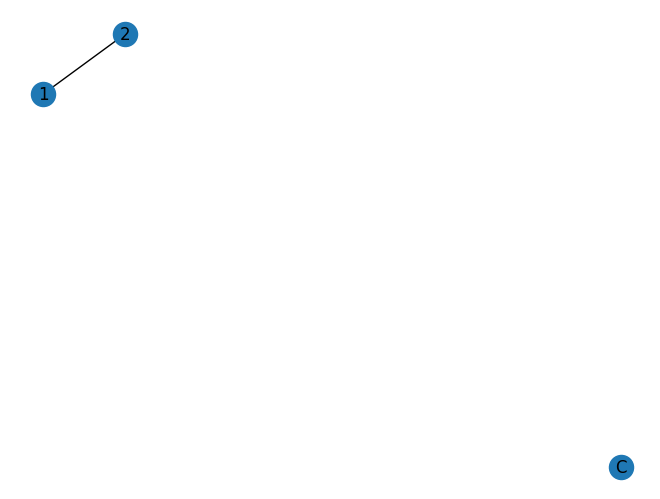

In [13]:
#Adding edges and nodes
G.add_edge(1,2,weight=0.9)
G.add_node('C')
nx.draw_spring(G, with_labels= True)
plt.show()

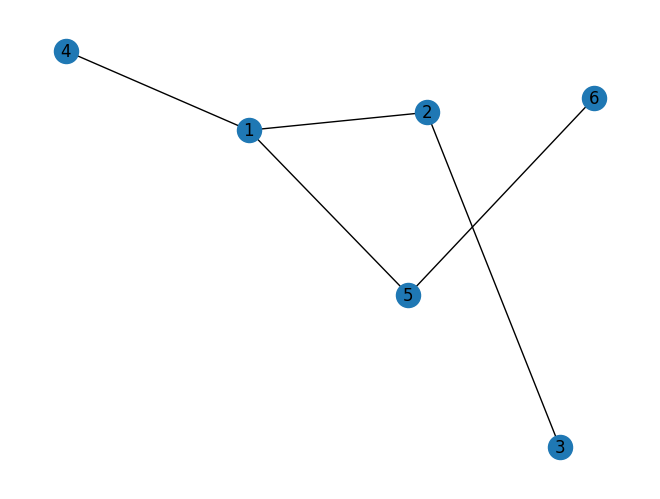

In [15]:
#this is list of tuples
edge_list= [(1,2),(2,3),(4,1),(1,5),(5,6)]
G=nx.from_edgelist(edge_list)
#another way
#G.add_edges_from(edge_list)
nx.draw_spring(G, with_labels= True)
plt.show()

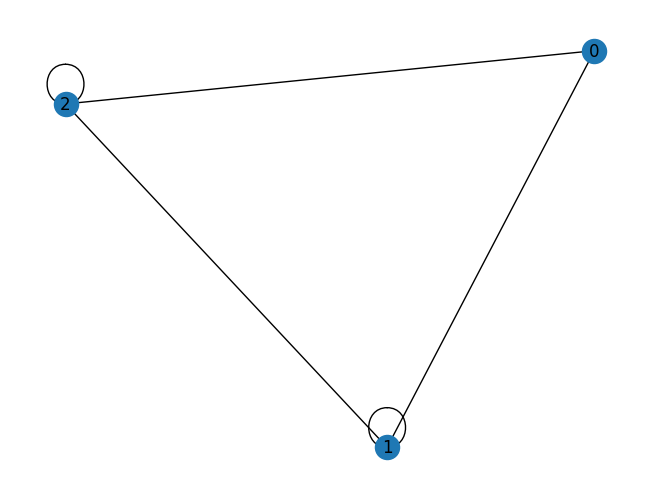

In [20]:
G=nx.from_numpy_array(np.array([[0,1,1],
        [1,1,0],
        [1,1,1]]))
nx.draw_spring(G, with_labels=True)
plt.show()

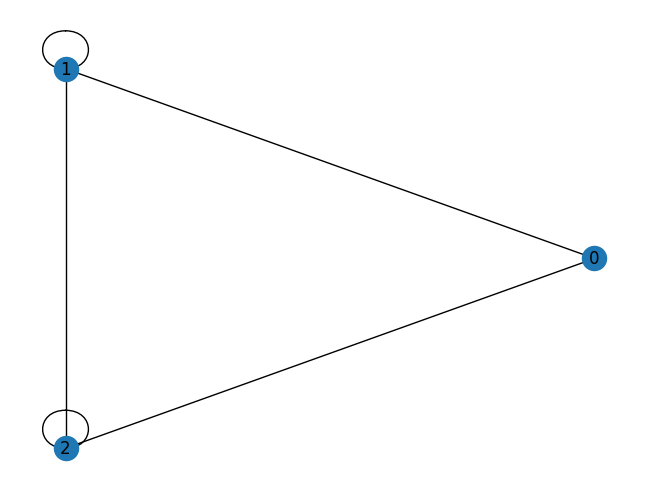

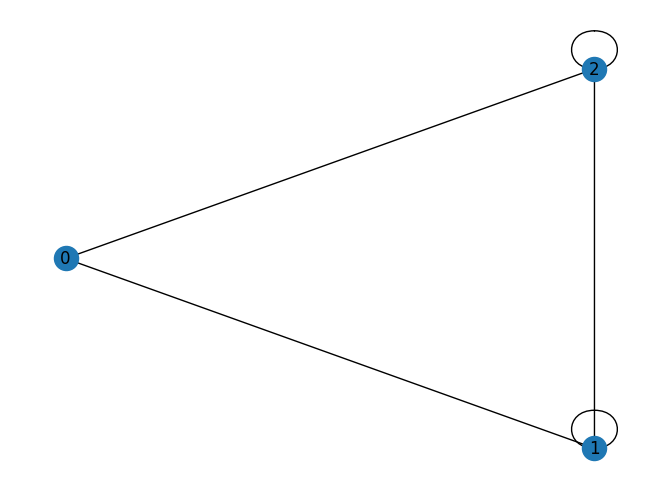

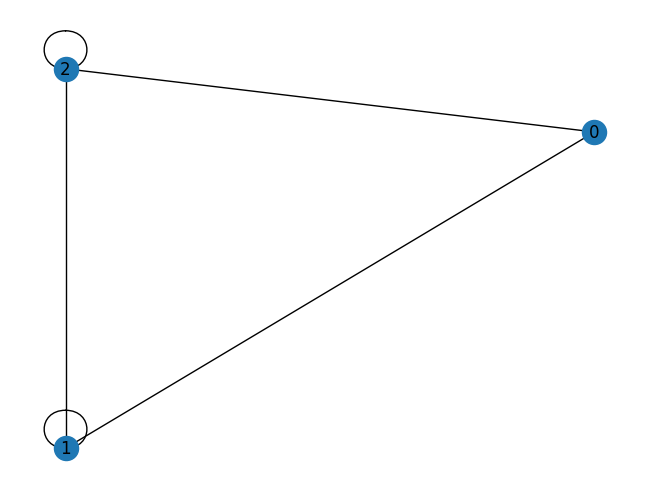

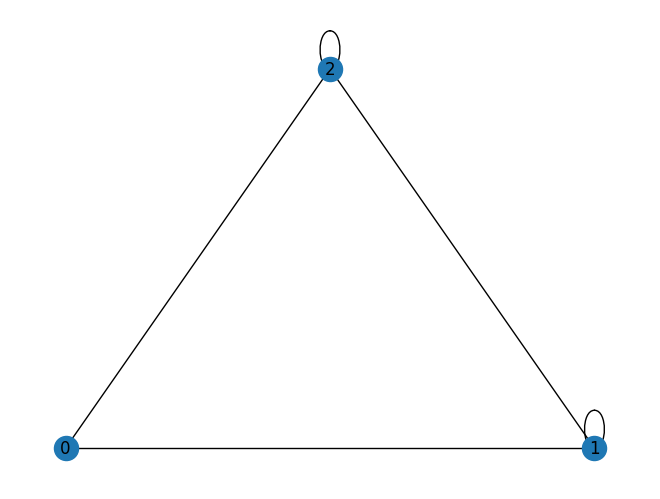

In [26]:
nx.draw_circular(G, with_labels=True)
plt.show()
nx.draw_shell(G, with_labels=True)
plt.show()
nx.draw_spectral(G, with_labels=True)
plt.show()
#planar makes sure edges doesnt intercet 
nx.draw_planar(G, with_labels=True)
plt.show()

In [30]:
#get the degree of the nodes, its in dictnatory form
print(dict(G.degree)[0])
#For directed graph
#print(dict(G.in_degree)[1])
#print(dict(G.out_degree)[1])

2


In [33]:
#print the shortest path btw 2 nodes(0 to 1)
print(nx.shortest_path(G,0,1))

[0, 1]


In [34]:
#centerality means, how well a node is positioned in the entire graph. Degree of the node is important for centerality. more the degree of the node, better the centerality
# closeness centerality, is the average distance from one node to all the other nodes. also the shortest path distance. this doesnt depend on higher degree of nodes. how close one node is from others.
#eigen Centerality, checks for the degree and the quality of the nodes(meaning, if you connect to unimportant nodes. your not so important. but if your connect to important nodes with even fewer degree has better centrality)
# betweenness centernality, how much percent of the shortest path/optimal path goes through a particular node. highest percentage has highest centernality.

In [36]:
print(nx.degree_centrality(G))
print(nx.closeness_centrality(G))
print(nx.eigenvector_centrality(G))
print(nx.betweenness_centrality(G))

{0: 1.0, 1: 2.0, 2: 2.0}
{0: 1.0, 1: 1.0, 2: 1.0}
{0: 0.4597008602526184, 1: 0.6279630240241071, 2: 0.6279630240241071}
{0: 0.0, 1: 0.0, 2: 0.0}


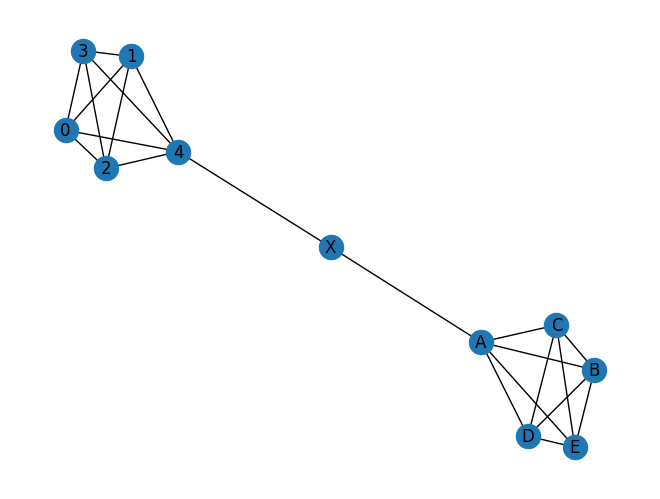

In [38]:
G1=nx.complete_graph(5)
G2=nx.complete_graph(5)
G2=nx.relabel_nodes(G2,{0:"A",1:"B",2:"C",3:"D",4:"E"})
G_connector= nx.from_edgelist([(4,"X"),("X","A")])
G=nx.compose_all([G1,G2,G_connector])
nx.draw_spring(G,with_labels=True)
plt.show()

In [39]:
#we an see that x has the lowest for degree centrality but has the highest for betweenness centrality
print(nx.degree_centrality(G))
print(nx.betweenness_centrality(G))

{0: 0.4, 1: 0.4, 2: 0.4, 3: 0.4, 4: 0.5, 'A': 0.5, 'B': 0.4, 'C': 0.4, 'D': 0.4, 'E': 0.4, 'X': 0.2}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.5333333333333333, 'A': 0.5333333333333333, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'X': 0.5555555555555556}


In [40]:
#density means, no. of edges divided by the max no. of possible edges a graph can have(in a complete graph, there is 100% edges so density is always one)
#longest path is called the diameter
print(nx.density(G))
print(nx.diameter(G))

0.4
4


In [41]:
#eulerian path means you have go through each edge only once, and traverse each node once or multiple times
print(list(nx.eulerian_path(G)))

[(4, 0), (0, 1), (1, 2), (2, 0), (0, 3), (3, 1), (1, 4), (4, 2), (2, 3), (3, 4), (4, 'X'), ('X', 'A'), ('A', 'B'), ('B', 'C'), ('C', 'A'), ('A', 'D'), ('D', 'B'), ('B', 'E'), ('E', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'A')]


In [43]:
#this acutally gives the number of COMPLETE sub-graphs in a graph
print(list(nx.find_cliques(G)))

[['C', 'E', 'A', 'B', 'D'], ['A', 'X'], [4, 0, 1, 2, 3], [4, 'X']]


In [44]:
#bridges are when a edge is deleted causes the graph to not be connected anymore, resulting in 2 or more seperate graphs
print(list(nx.bridges(G)))

[(4, 'X'), ('A', 'X')]


In [45]:
#local bridge is when you have edge btw 2 nodes and those nodes doesnt have any common edgesafter being removed the edge. those making sure, they have take even more longer path or traverse through one more node atleast to connect to each other.
#so this basically result in path distance btw 2 edges after removing that one common edge
print(list(nx.local_bridges(G)))
#the result tells us that this graph doesnt have any local bridges

[(4, 'X', inf), ('A', 'X', inf)]
